In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv("customer_churn.csv")
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
5637,4423-JWZJN,Male,0,Yes,Yes,64,Yes,Yes,Fiber optic,No,...,Yes,No,No,Yes,One year,No,Credit card (automatic),90.25,5629.15,No
4207,8706-HRADD,Male,0,No,No,21,No,No phone service,DSL,Yes,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,43.55,1011.5,No
6839,4078-SAYYN,Female,0,No,No,11,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,100.75,1129.75,Yes
3565,4317-VTEOA,Male,0,No,No,1,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,50.75,50.75,Yes
6805,4323-OHFOW,Female,1,Yes,No,70,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),105.55,7195.35,No


In [3]:
df.drop('customerID',axis='columns',inplace=True)

In [4]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [5]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [6]:
# df['TotalCharges'] = df['TotalCharges'].apply(lambda x: x.strip() if isinstance(x, str) else x)

In [7]:
pd.to_numeric(df.TotalCharges,errors='coerce')

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [8]:
pd.to_numeric(df.TotalCharges,errors='coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [9]:
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [10]:
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()].shape

(11, 20)

In [11]:
df.shape

(7043, 20)

In [15]:
df1 = df[df.TotalCharges!=' ']

In [16]:
df1.shape

(7032, 20)

In [17]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)

C:\Users\sinan\AppData\Local\Temp\ipykernel_3248\973151263.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.TotalCharges = pd.to_numeric(df1.TotalCharges)


In [18]:
df1.TotalCharges.dtypes

dtype('float64')

Text(0, 0.5, 'No. of customers')

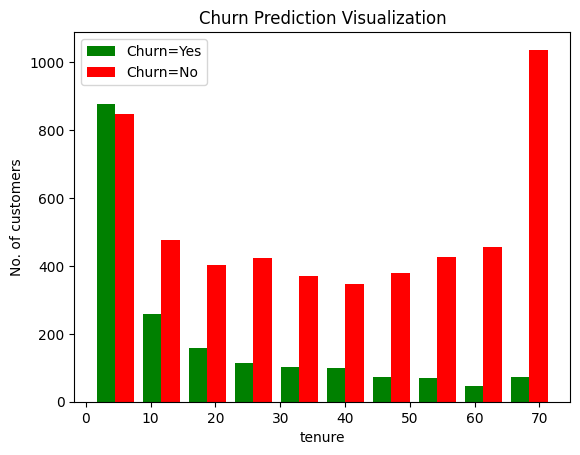

In [19]:
tenure_churn_no = df1[df1.Churn=='No'].tenure
tenure_churn_yes = df1[df1.Churn=='Yes'].tenure
plt.hist([tenure_churn_yes, tenure_churn_no],color=['green', 'red'],label=['Churn=Yes', 'Churn=No'])
plt.legend()
plt.title("Churn Prediction Visualization")
plt.xlabel("tenure")
plt.ylabel("No. of customers")

Text(0, 0.5, 'No. of customers')

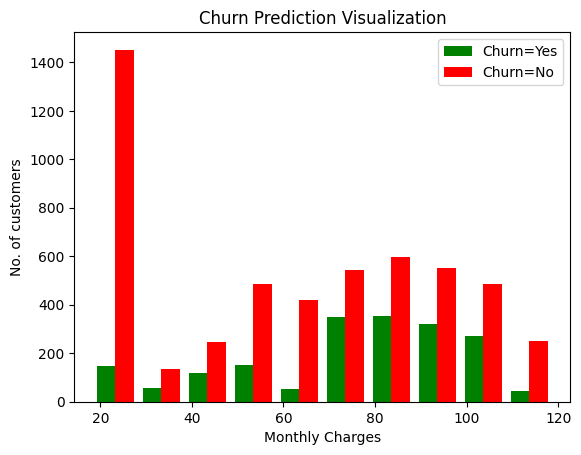

In [20]:
mc_churn_no = df1[df1.Churn=='No'].MonthlyCharges
mc_churn_yes = df1[df1.Churn=='Yes'].MonthlyCharges
plt.hist([mc_churn_yes, mc_churn_no],color=['green', 'red'],label=['Churn=Yes', 'Churn=No'])
plt.legend()
plt.title("Churn Prediction Visualization")
plt.xlabel("Monthly Charges")
plt.ylabel("No. of customers")

In [21]:
def print_unique_col_values(df):
    for col in df:
        if df[col].dtypes == 'object':
            print(f"{col} : unique values -> {df[col].unique()}")

In [22]:
print_unique_col_values(df1)

gender : unique values -> ['Female' 'Male']
Partner : unique values -> ['Yes' 'No']
Dependents : unique values -> ['No' 'Yes']
PhoneService : unique values -> ['No' 'Yes']
MultipleLines : unique values -> ['No phone service' 'No' 'Yes']
InternetService : unique values -> ['DSL' 'Fiber optic' 'No']
OnlineSecurity : unique values -> ['No' 'Yes' 'No internet service']
OnlineBackup : unique values -> ['Yes' 'No' 'No internet service']
DeviceProtection : unique values -> ['No' 'Yes' 'No internet service']
TechSupport : unique values -> ['No' 'Yes' 'No internet service']
StreamingTV : unique values -> ['No' 'Yes' 'No internet service']
StreamingMovies : unique values -> ['No' 'Yes' 'No internet service']
Contract : unique values -> ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : unique values -> ['Yes' 'No']
PaymentMethod : unique values -> ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : unique values -> ['No' 'Yes']


In [23]:
df1.replace('No phone service','No',inplace=True)
df1.replace('No internet service','No',inplace=True)

C:\Users\sinan\AppData\Local\Temp\ipykernel_3248\3221983738.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No phone service','No',inplace=True)
C:\Users\sinan\AppData\Local\Temp\ipykernel_3248\3221983738.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No internet service','No',inplace=True)


In [24]:
print_unique_col_values(df1)

gender : unique values -> ['Female' 'Male']
Partner : unique values -> ['Yes' 'No']
Dependents : unique values -> ['No' 'Yes']
PhoneService : unique values -> ['No' 'Yes']
MultipleLines : unique values -> ['No' 'Yes']
InternetService : unique values -> ['DSL' 'Fiber optic' 'No']
OnlineSecurity : unique values -> ['No' 'Yes']
OnlineBackup : unique values -> ['Yes' 'No']
DeviceProtection : unique values -> ['No' 'Yes']
TechSupport : unique values -> ['No' 'Yes']
StreamingTV : unique values -> ['No' 'Yes']
StreamingMovies : unique values -> ['No' 'Yes']
Contract : unique values -> ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : unique values -> ['Yes' 'No']
PaymentMethod : unique values -> ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : unique values -> ['No' 'Yes']


In [25]:
yes_no_columns = df1.columns[df1.nunique() == 2]
yes_no_columns = yes_no_columns.drop(['gender','SeniorCitizen'])

In [26]:
yes_no_columns.shape

(12,)

In [27]:
for col in yes_no_columns:
    df1[col].replace({'Yes' : 1, 'No': 0},inplace=True)

C:\Users\sinan\AppData\Local\Temp\ipykernel_3248\3257780336.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1[col].replace({'Yes' : 1, 'No': 0},inplace=True)
C:\Users\sinan\AppData\Local\Temp\ipykernel_3248\3257780336.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1[col].replace({'Yes' 

In [28]:
for col in df1:
    print(df1[col].unique())

['Female' 'Male']
[0 1]
[1 0]
[0 1]
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
[0 1]
[0 1]
['DSL' 'Fiber optic' 'No']
[0 1]
[1 0]
[0 1]
[0 1]
[0 1]
[0 1]
['Month-to-month' 'One year' 'Two year']
[1 0]
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
[  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
[0 1]


In [29]:
df1['gender'].replace({'Female': 1, 'Male': 0},inplace= True)

C:\Users\sinan\AppData\Local\Temp\ipykernel_3248\1794963026.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['gender'].replace({'Female': 1, 'Male': 0},inplace= True)
C:\Users\sinan\AppData\Local\Temp\ipykernel_3248\1794963026.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1['gender'].

In [30]:
df1['gender'].unique()

array([1, 0], dtype=int64)

In [31]:
df2 = pd.get_dummies(data=df1, columns=['InternetService','Contract','PaymentMethod'])
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [32]:
df2.sample(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
4110,0,0,1,0,70,1,0,1,1,0,...,True,False,False,False,False,True,False,False,False,True
3834,1,0,1,1,57,1,0,1,0,0,...,True,False,False,False,True,False,True,False,False,False
5316,0,0,1,1,49,1,1,0,1,1,...,False,True,False,False,True,False,False,False,True,False


In [33]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                           bool
InternetService_Fiber optic                   bool
InternetService_No             

In [34]:
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

In [35]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [36]:
df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [37]:
df2.sample(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
1634,0,0,1,1,0.873239,0,0,1,1,1,...,True,False,False,False,False,True,False,False,True,False
857,0,0,0,0,0.000000,1,0,0,1,0,...,True,False,False,True,False,False,False,False,True,False
2004,0,0,0,0,0.323944,1,1,0,0,1,...,False,True,False,True,False,False,False,False,False,True


In [53]:
X = df2.drop('Churn', axis=1)
X = X.astype('float64')
y = df2['Churn']
y = y.astype('float64')

In [54]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [55]:
len(X_train.columns)

26

In [56]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(26, input_shape=(26,), activation='relu'),
    keras.layers.Dense(1, activation='sigmoid'),
])

In [57]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [60]:
model.fit(X_train, y_train, epochs=100)

Epoch 1/100
176/176 [==============================] - 3s 16ms/step - loss: 0.4132 - accuracy: 0.8055
Epoch 2/100
176/176 [==============================] - 3s 15ms/step - loss: 0.4110 - accuracy: 0.8075
Epoch 3/100
176/176 [==============================] - 3s 20ms/step - loss: 0.4102 - accuracy: 0.8073
Epoch 4/100
176/176 [==============================] - 3s 15ms/step - loss: 0.4090 - accuracy: 0.8071
Epoch 5/100
176/176 [==============================] - 3s 17ms/step - loss: 0.4077 - accuracy: 0.8069
Epoch 6/100
176/176 [==============================] - 3s 17ms/step - loss: 0.4078 - accuracy: 0.8082
Epoch 7/100
176/176 [==============================] - 3s 15ms/step - loss: 0.4058 - accuracy: 0.8101
Epoch 8/100
176/176 [==============================] - 3s 16ms/step - loss: 0.4055 - accuracy: 0.8098
Epoch 9/100
176/176 [==============================] - 3s 16ms/step - loss: 0.4047 - accuracy: 0.8100
Epoch 10/100
176/176 [==============================] - 3s 15ms/step - loss: 0.404

In [59]:
X_train.dtypes

gender                                     float64
SeniorCitizen                              float64
Partner                                    float64
Dependents                                 float64
tenure                                     float64
PhoneService                               float64
MultipleLines                              float64
OnlineSecurity                             float64
OnlineBackup                               float64
DeviceProtection                           float64
TechSupport                                float64
StreamingTV                                float64
StreamingMovies                            float64
PaperlessBilling                           float64
MonthlyCharges                             float64
TotalCharges                               float64
InternetService_DSL                        float64
InternetService_Fiber optic                float64
InternetService_No                         float64
Contract_Month-to-month        

In [51]:
y_train.dtypes

dtype('int64')

In [61]:
yp = model.predict(X_test)
yp[:5]

44/44 [==============================] - 0s 6ms/step


array([[0.19163668],
       [0.37540814],
       [0.00380433],
       [0.8078162 ],
       [0.33747515]], dtype=float32)

In [62]:
y_pred = []
for val in yp:
    if val > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [63]:
y_pred[:10]

[0, 0, 0, 1, 0, 1, 0, 0, 0, 0]

In [64]:
y_test[:10]

2660    0.0
744     0.0
5579    1.0
64      1.0
3287    1.0
816     1.0
2670    0.0
5920    0.0
1023    0.0
6087    0.0
Name: Churn, dtype: float64

In [66]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.82      0.90      0.86       999
         1.0       0.68      0.51      0.58       408

    accuracy                           0.79      1407
   macro avg       0.75      0.71      0.72      1407
weighted avg       0.78      0.79      0.78      1407



Text(95.72222222222221, 0.5, 'Truth')

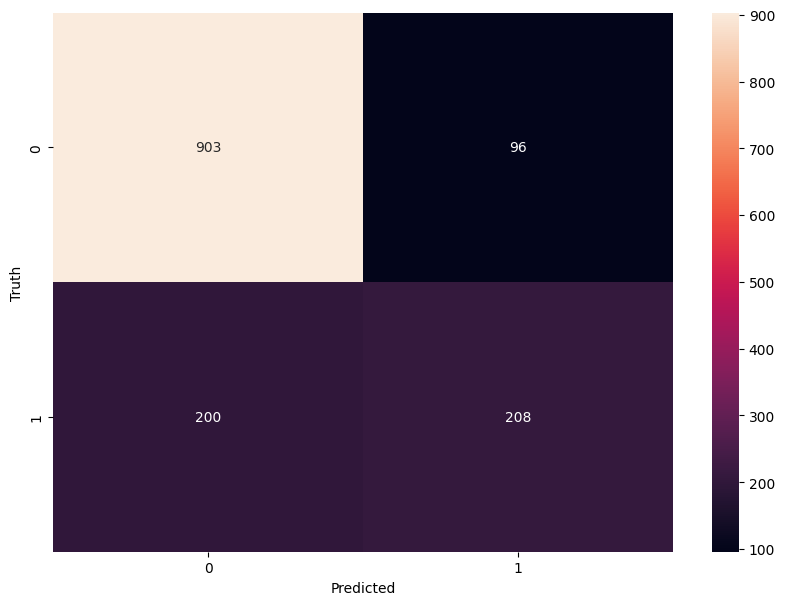

In [67]:
import seaborn as sns
cm = tf.math.confusion_matrix(labels = y_test, predictions = y_pred)

plt.figure(figsize = (10,7))
sns.heatmap(cm,annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')